## 1. Scala's real-world project repository data
<p>With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.</p>
<p>Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available. </p>
<p>We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.</p>
<p>The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:</p>
<ol>
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ol>

In [1]:
import pandas as pd
pulls_one = pd.read_csv(r'E:\cde\Module_01(Python)\CDE-B3-SH-main\projects\pulls_2011-2013.csv')
pulls_two = pd.read_csv(r'E:\cde\Module_01(Python)\CDE-B3-SH-main\projects\pulls_2014-2018.csv')
pull_files = pd.read_csv(r'E:\cde\Module_01(Python)\CDE-B3-SH-main\projects\pull_files.csv') 

In [2]:
pulls = pd.concat([pulls_one, pulls_two])
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [3]:
data = pulls.merge(pull_files, on='pid')
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


             pid  user  date  file
month year                        
1     2012   489   489   489   489
      2013  3717  3717  3717  3717
      2014  1140  1140  1140  1140
      2015   732   732   732   732
      2016   640   640   640   640
...          ...   ...   ...   ...
12    2013  1692  1692  1692  1692
      2014  1001  1001  1001  1001
      2015   616   616   616   616
      2016   468   468   468   468
      2017   224   224   224   224

[74 rows x 4 columns]


<Axes: xlabel='month,year'>

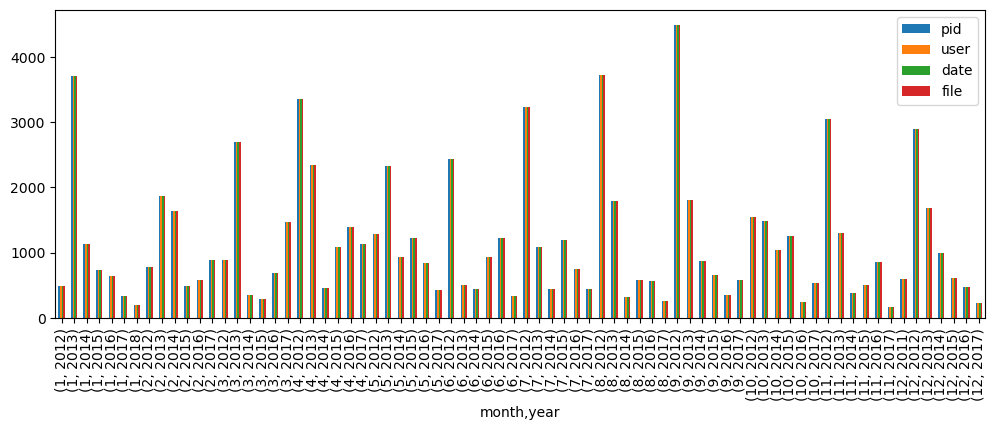

In [4]:
%matplotlib inline
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year
counts = data.groupby(['month', 'year']).count()
print(counts)
counts.plot(kind='bar', figsize=(12, 4))

Text(0.5, 1.0, 'Is the project welcoming to the new Contributors ?')

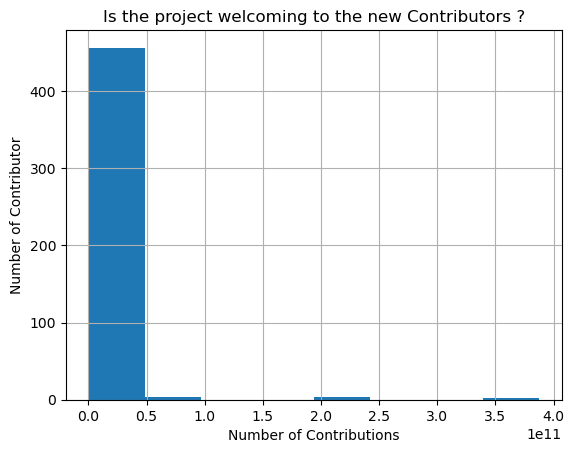

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
by_user = data.groupby('user').agg({'pid': 'sum'})
by_user.hist(bins=8)
plt.xlabel('Number of Contributions')
plt.ylabel('Number of Contributor')
plt.title('Is the project welcoming to the new Contributors ?')

In [7]:
pull_10 = pulls[-10:]
joined_pr = pull_10.merge(pull_files, on='pid')
unique_file = set(joined_pr['file'].unique())
unique_file

{'build.xml',
 'src/asm/scala/tools/asm/MethodWriter.java',
 'src/compiler/scala/tools/nsc/ast/parser/Parsers.scala',
 'src/compiler/scala/tools/nsc/ast/parser/Scanners.scala',
 'src/compiler/scala/tools/nsc/backend/icode/GenICode.scala',
 'src/compiler/scala/tools/nsc/backend/icode/Members.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/GenASM.scala',
 'src/compiler/scala/tools/nsc/symtab/BrowsingLoaders.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ICodeReader.scala',
 'src/compiler/scala/tools/nsc/typechecker/Typers.scala',
 'src/library/scala/collection/immutable/HashMap.scala',
 'src/library/scala/collection/immutable/HashSet.scala',
 'src/library/scala/math/Numeric.scala',
 'src/reflect/scala/reflect/api/StandardLiftables.scala',
 'src/reflect/scala/reflect/api/Trees.scala',
 'src/reflect/scala/reflect/internal/Importers.scala',
 'src/reflect/scala/reflect/internal/Trees.scala',
 'src/reflect/scala/reflect/internal/pickling/UnPickler.scala',
 'test/files/neg/t6426.ch

In [9]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file'] == file] 
author_counts = file_pr.groupby('user').count()
print(list(author_counts.nlargest(3, 'pid').index))

['xeno-by', 'retronym', 'soc']


In [10]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = pull_files[pull_files['file'] == file]
joined_pr = file_pr.merge(pulls, on='pid')
users_last_10 = set(joined_pr.nlargest(10, 'pid', keep = 'last')['user'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

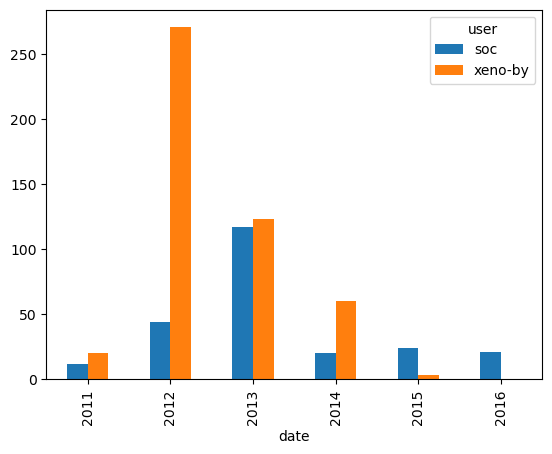

In [11]:
%matplotlib inline
authors = ['xeno-by', 'soc']
by_author = pulls[pulls['user'].isin(authors)]
counts = by_author.groupby(['user', by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide.plot.bar()
plt.show()

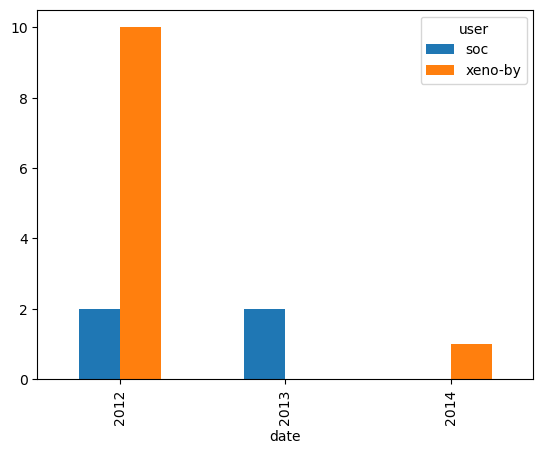

In [12]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
by_author = data[(data['user'] == authors[0]) | (data['user'] == authors[1])]
by_file = by_author[by_author['file'] == file]
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)
by_file_wide.plot(kind='bar')
plt.show()